In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# be careful with that:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# load data

data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')
data_metrics = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_3p.csv')

In [72]:
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986']

cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353']

In [73]:
data_metrics_1 = data_metrics[(data_metrics.grid_id == 333519) & 
             (data_metrics.domain.isin(data_heatmap[data_heatmap.grid_id == 333519]['domain'].unique()))]
data_metrics_1['broken'] = 0
data_metrics_1.loc[data_metrics_1.domain.isin(cb_333519),'broken'] = 1

data_metrics_2 = data_metrics[(data_metrics.grid_id == 333346) & 
             (data_metrics.domain.isin(data_heatmap[data_heatmap.grid_id == 333346]['domain'].unique()))]
data_metrics_2['broken'] = 0
data_metrics_2.loc[data_metrics_2.domain.isin(cb_333346),'broken'] = 1

data_metrics = pd.concat([data_metrics_1,data_metrics_2],axis = 0)

In [206]:
data_heatmap['broken'] = 0
data_heatmap.loc[(data_heatmap.grid_id == 333519) &
            data_heatmap.domain.isin(cb_333519), 'broken'] = 1
data_heatmap.loc[(data_heatmap.grid_id == 333346) &
            data_heatmap.domain.isin(cb_333346), 'broken'] = 1

In [247]:
# Train/Test split (comment out):

import os
from sklearn.model_selection import train_test_split

# os.mkdir('../datasets/train') 
# os.mkdir('../datasets/test') 

t = data_heatmap.drop_duplicates(['grid_id','domain'])[['domain','grid_id', 'broken']].reset_index(drop = True)
# t['broken'] = 0
# t.loc[((t.grid_id == 333519) & t['domain'].isin(cb_333519)) |
#   ((t.grid_id == 333346) & t['domain'].isin(cb_333346)),'broken'] = 1

train, test = [],[]
for gid in t['grid_id'].unique():
    train_, test_ = train_test_split(t[t.grid_id == gid], 
                     stratify = t[t.grid_id == gid]['broken'], 
                     test_size = .3,
                     random_state = 42)
    train.append(train_)
    test.append(test_)
    
print([tt['broken'].sum() for tt in train], [tt['broken'].sum() for tt in test])
print([tt['broken'].shape[0] for tt in train], [tt['broken'].shape[0] for tt in test])

train = pd.concat(train)
test  = pd.concat(test)

test_comb  = pd.merge(test[['domain','grid_id']], 
                      data_heatmap,
                      how = 'left', 
                      on  = ['domain', 'grid_id']).drop(columns = ['Unnamed: 0'])

train_comb = pd.merge(train[['domain','grid_id']], 
                      data_heatmap, 
                      how = 'left', 
                      on  = ['domain', 'grid_id']).drop(columns = ['Unnamed: 0'])

test_comb.to_csv('../datasets/test/data_heatmap_test.csv')  
train_comb.to_csv('../datasets/train/data_heatmap_train.csv')  

test_comb_metrics  = pd.merge(test[['domain','grid_id']], 
                      data_metrics,
                      how = 'left', 
                      on  = ['domain', 'grid_id']).drop(columns = ['Unnamed: 0'])

train_comb_metrics = pd.merge(train[['domain','grid_id']], 
                      data_metrics, 
                      how = 'left', 
                      on  = ['domain', 'grid_id']).drop(columns = ['Unnamed: 0'])


test_comb_metrics.to_csv('../datasets/test/data_metrics_test.csv')  
train_comb_metrics.to_csv('../datasets/train/data_metrics_train.csv')  

[40, 79] [17, 34]
[610, 602] [262, 259]


In [74]:
# expand so that each row corresponds to 1 click:

data_heatmap_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)
data_heatmap_expanded['clicks'] = 1

click_stat = data_heatmap_expanded.groupby(['click_x','click_y'])['clicks'].count().reset_index()

In [77]:
# Binning clicks in nr_of_x_bins, nr_of_y_bins:

NR_OF_X_BINS = 61
NR_OF_Y_BINS = 51

max_width = data_heatmap['display_width'].max()
max_height = data_heatmap['display_height'].max()

width_bins = np.linspace(1, max_width, NR_OF_X_BINS)
height_bins = np.linspace(1, max_height, NR_OF_Y_BINS)

width_bins_max = len(width_bins)-2 # start at 0
height_bins_max = len(height_bins)-2

data_heatmap_expanded['click_x_bin'] = pd.cut(data_heatmap_expanded['click_x'], 
                                      bins   = width_bins, 
                                      labels = False, 
                                      include_lowest = True)

data_heatmap_expanded['click_y_bin'] = pd.cut(data_heatmap_expanded['click_y'], 
                                      bins = height_bins, 
                                      labels = False, 
                                      include_lowest = True)


aggregated_clicks = data_heatmap_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


aggregated_clicks['broken'] = 0
aggregated_clicks.loc[(aggregated_clicks.grid_id == 333519) &
            aggregated_clicks.domain.isin(cb_333519), 'broken'] = 1
aggregated_clicks.loc[(aggregated_clicks.grid_id == 333346) &
            aggregated_clicks.domain.isin(cb_333346), 'broken'] = 1

#aggregated_clicks['clicks_sum'].astype('int64');

In [82]:
print(len(aggregated_clicks[(aggregated_clicks.broken == 1) & 
                  (aggregated_clicks.grid_id == 333346)]['domain'].unique()),
     len(aggregated_clicks[(aggregated_clicks.broken == 1) & 
                  (aggregated_clicks.grid_id == 333519)]['domain'].unique()))

113 57


In [85]:
# add empty bins --> easier to generate vectors
# takes a few seconds

from itertools import product

domains_grids = data_heatmap[['domain', 'grid_id']].drop_duplicates()

aux = pd.DataFrame(list(product(range(0,width_bins_max+1), 
                                range(0,height_bins_max+1))), 
                   columns=['click_x_bin', 'click_y_bin'])

domains_grids['key'] = 1
aux['key'] = 1

expanded_set = pd.merge(domains_grids, aux, on='key').drop('key', axis=1)

data_binned = pd.merge(expanded_set, aggregated_clicks, 
                  on = ['domain', 'grid_id', 'click_x_bin', 'click_y_bin'], 
                  how = 'left').fillna(0)
data_binned['clicks_sum'] = data_binned['clicks_sum'].astype('int64')
data_binned['broken'] = data_binned['broken'].astype('int64')

data_binned

,domain,grid_id,click_x_bin,click_y_bin,clicks_sum,broken
0,ID_1763,333519,0,0,0,0
1,ID_1763,333519,0,1,0,0
2,ID_1763,333519,0,2,0,0
3,ID_1763,333519,0,3,0,0
4,ID_1763,333519,0,4,0,0
...,...,...,...,...,...,...
5198995,ID_1382,333346,59,45,0,0
5198996,ID_1382,333346,59,46,0,0
5198997,ID_1382,333346,59,47,0,0
5198998,ID_1382,333346,59,48,0,0


In [86]:
print(len(data_binned[(data_binned.grid_id == 333346) & 
            (data_binned.broken == 1)]['domain'].unique()),
      len(data_binned[(data_binned.grid_id == 333519) & 
            (data_binned.broken == 1)]['domain'].unique()))

113 57


In [87]:
cl_stat = aggregated_clicks.groupby(['click_x_bin','click_y_bin']).count().reset_index()
cl_stat = cl_stat[['click_x_bin','click_y_bin','clicks_sum']]
cl_stat['bin_prob'] = cl_stat['clicks_sum']/cl_stat['clicks_sum'].sum()

In [97]:
# aggregated clicks by grid_id:

aggregated_clicks_by_grid = aggregated_clicks.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
aggregated_clicks_by_grid.drop(columns = ['broken'], inplace=True)

In [98]:
aggregated_clicks_by_grid

,grid_id,click_x_bin,click_y_bin,clicks_sum
0,333346,0,0,575
1,333346,0,1,458
2,333346,0,2,817
3,333346,0,3,1485
4,333346,0,4,483
...,...,...,...,...
5936,333519,59,45,128
5937,333519,59,46,105
5938,333519,59,47,157
5939,333519,59,48,186


------

# Some visualization

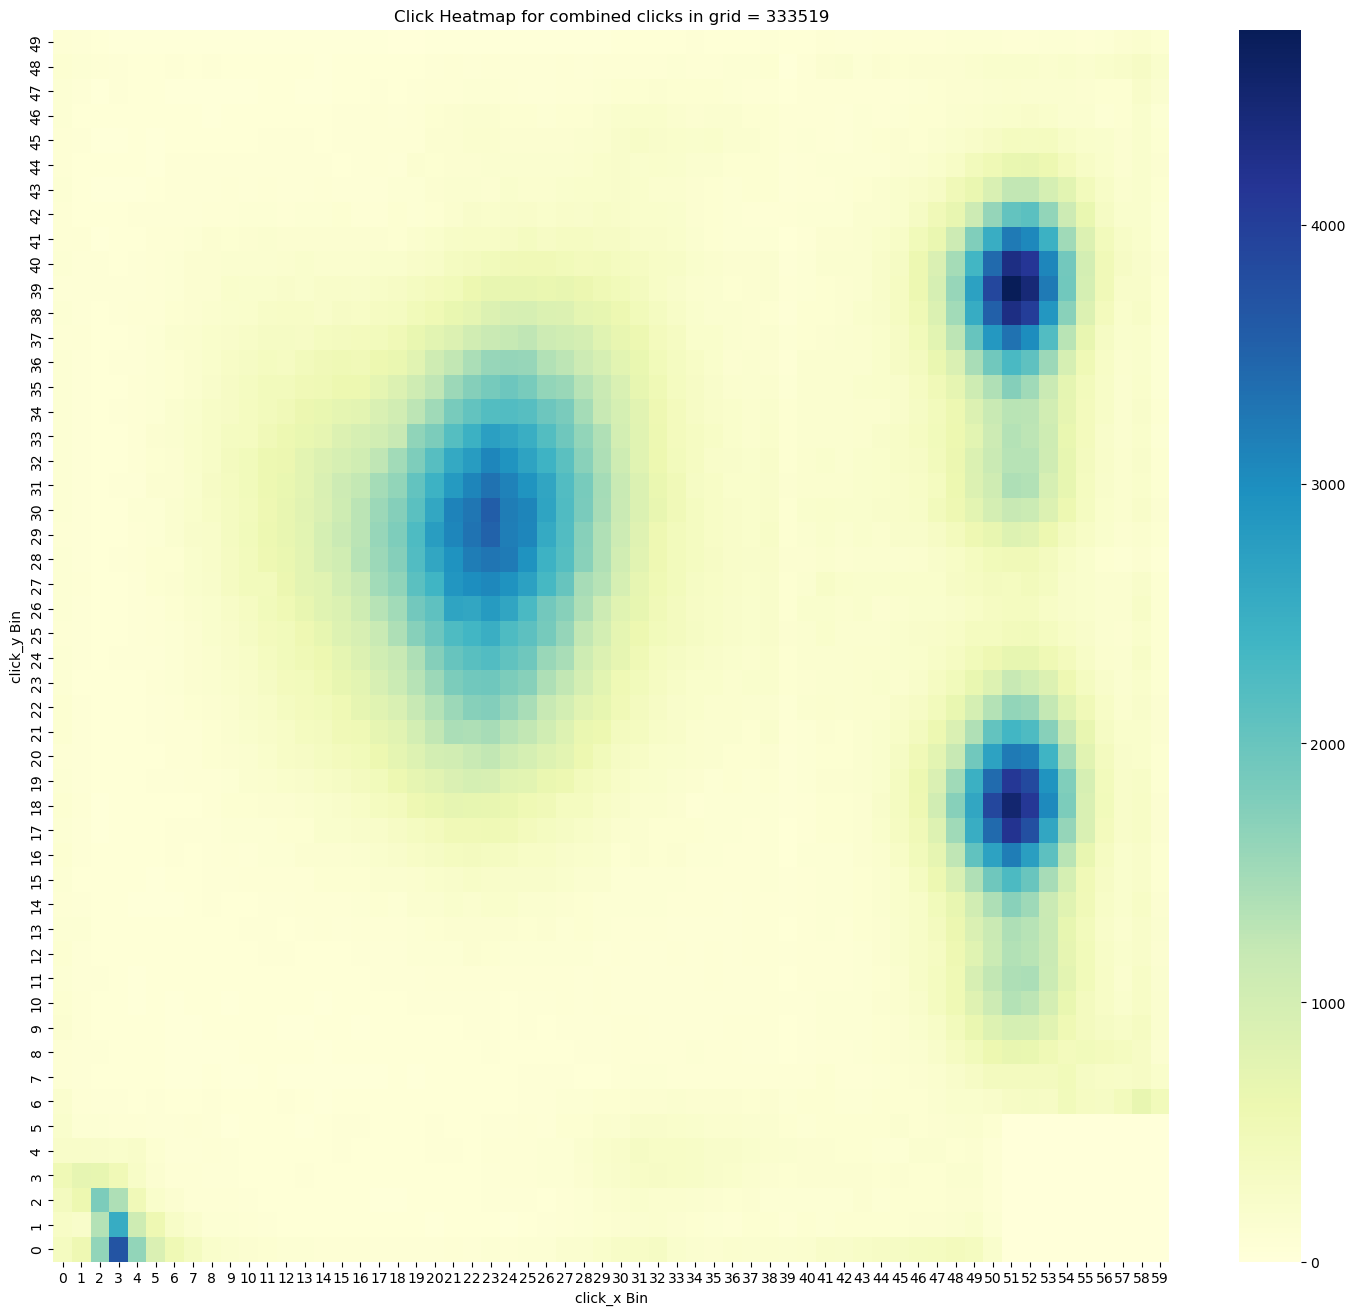

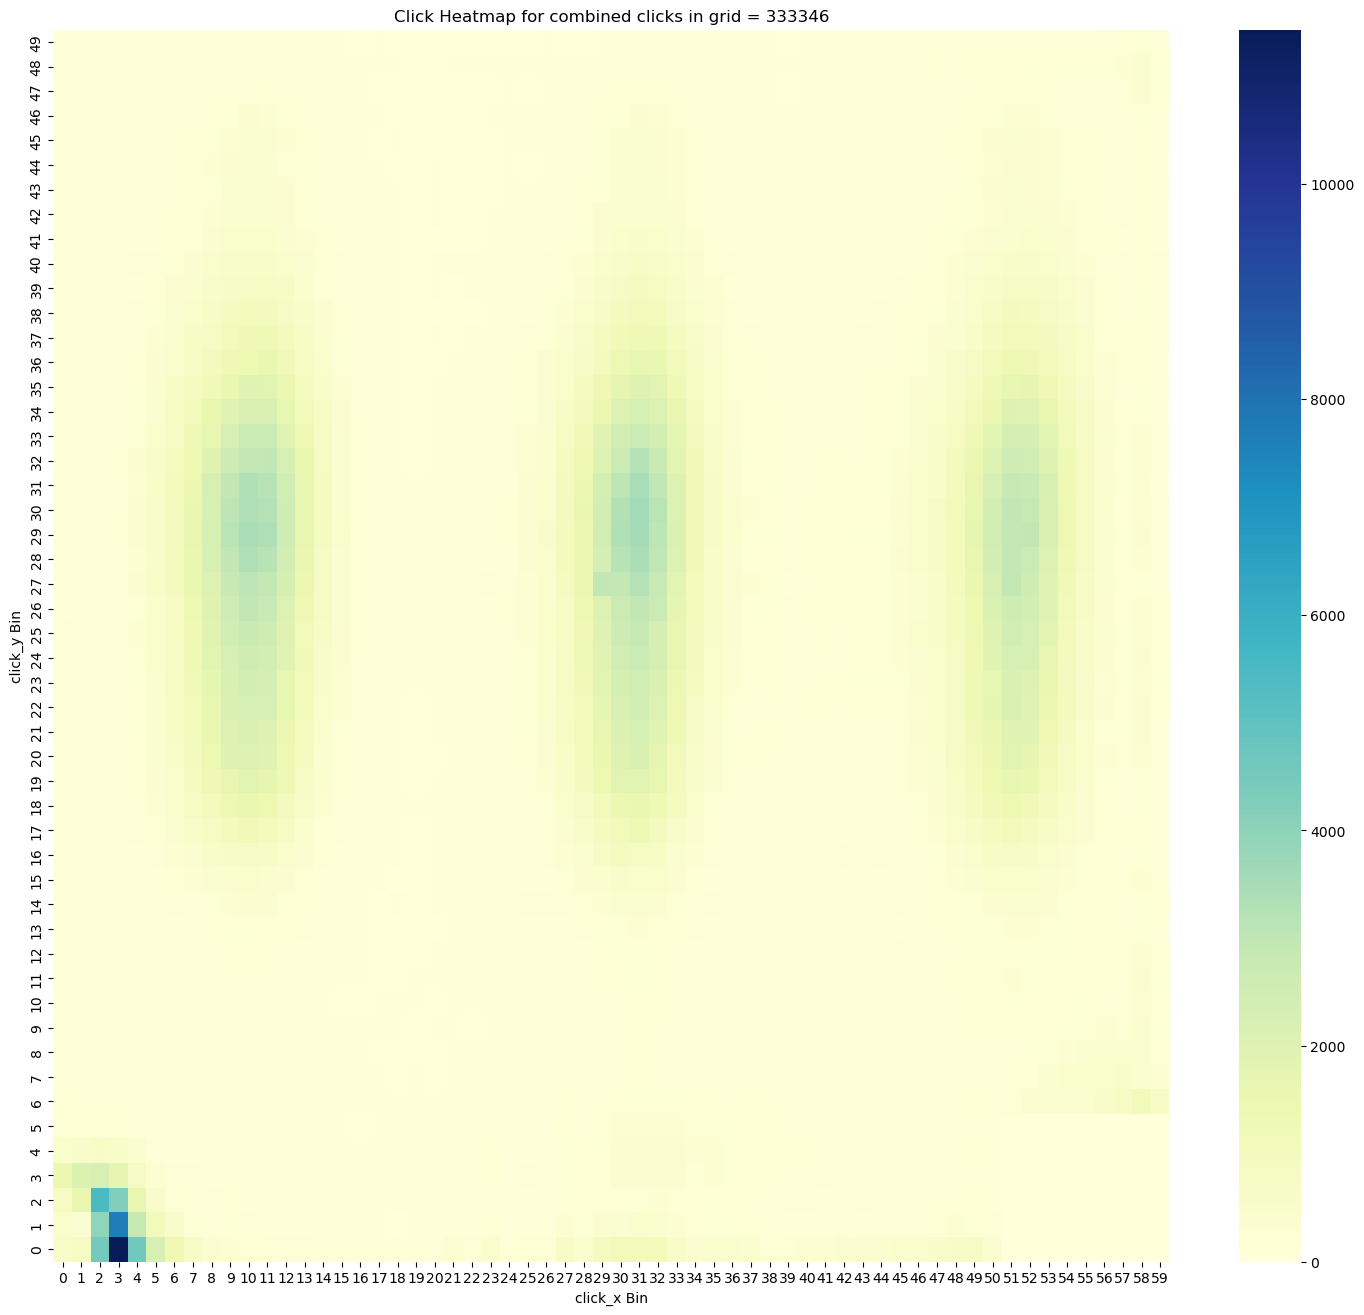

In [9]:
# create aggregated heatmaps:

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333519]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333519}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

ex = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == 333346]

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(18, 16))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for combined clicks in grid = {333346}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig('hm_333519.png', bbox_inches='tight')
plt.show()

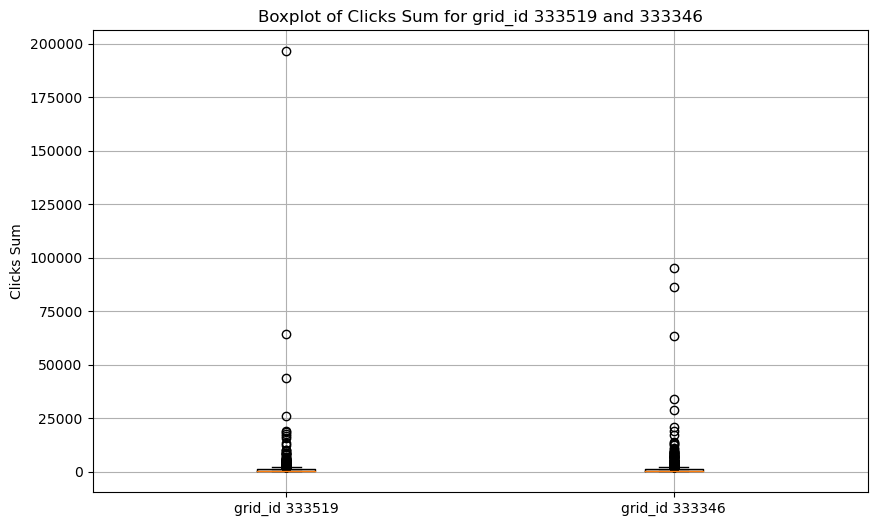

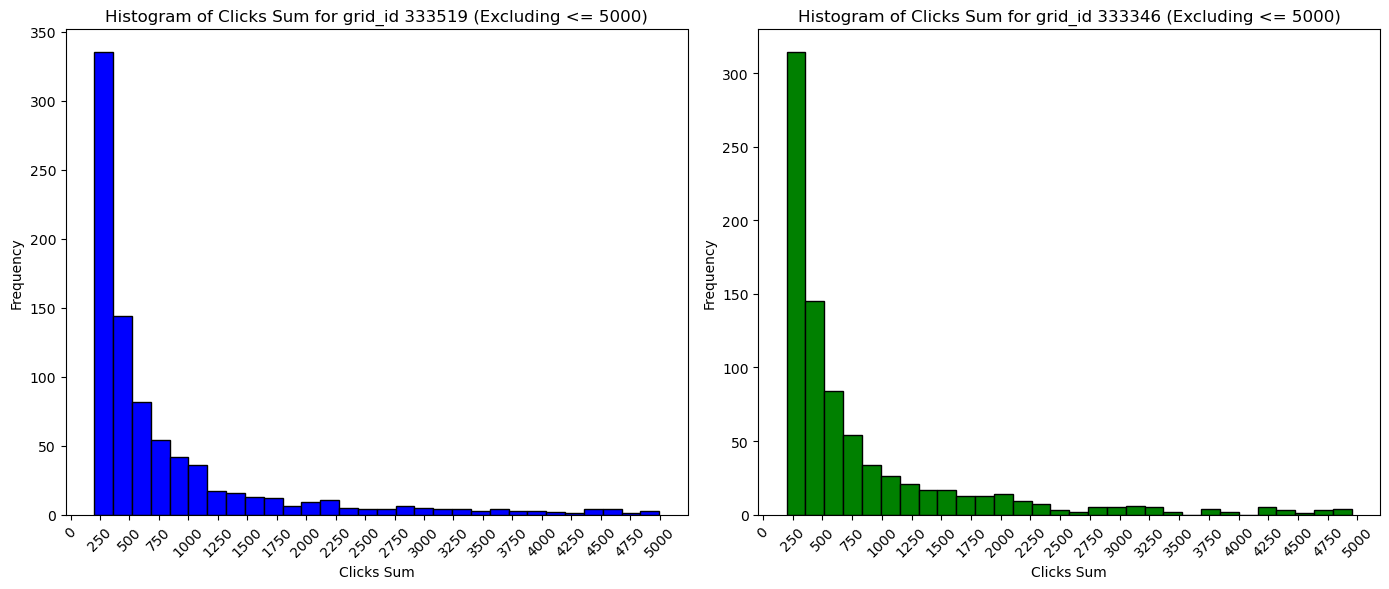

Nr of domains with grid_id 333346 and more than 1k clicks: 227
Percentage of domains with grid_id 333346 and more than 1k clicks: 0.26
Nr of domains with grid_id 333519 and more than 1k clicks: 215
Percentage of domains with grid_id 333519 and more than 1k clicks: 0.25


In [10]:
# Boxplots and histograms

x = aggregated_clicks.groupby(['domain','grid_id']).sum().reset_index()

data_333519 = x[x.grid_id == 333519]['clicks_sum']
data_333346 = x[x.grid_id == 333346]['clicks_sum']

plt.figure(figsize=(10, 6))
plt.boxplot([data_333519, data_333346], labels=['grid_id 333519', 'grid_id 333346'])
plt.title('Boxplot of Clicks Sum for grid_id 333519 and 333346')
plt.ylabel('Clicks Sum')
plt.grid(True)
#plt.savefig('bp.png', bbox_inches='tight')
plt.show()

data_333519 = x[(x.grid_id == 333519) & (x.clicks_sum <= 5000)]['clicks_sum']
data_333346 = x[(x.grid_id == 333346) & (x.clicks_sum <= 5000)]['clicks_sum']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data_333519, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Clicks Sum for grid_id 333519 (Excluding <= 5000)')
plt.xlabel('Clicks Sum')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.ticklabel_format(style='plain', axis='x') 
plt.locator_params(axis='x', nbins=24)  

plt.subplot(1, 2, 2)
plt.hist(data_333346, bins=30, color='green', edgecolor='black')
plt.title('Histogram of Clicks Sum for grid_id 333346 (Excluding <= 5000)')
plt.xlabel('Clicks Sum')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='x')  
plt.locator_params(axis='x', nbins=24) 

plt.tight_layout()

#plt.savefig('histo.png', bbox_inches='tight')
plt.show()

g_333346_nr_ge1000 = len(x[(x.grid_id == 333346) & (x.clicks_sum > 1000)]['domain'].unique())
pct_333346_nr_ge1000 = g_333346_nr_ge1000/len(x[(x.grid_id == 333346)]['domain'].unique())
print(f'Nr of domains with grid_id {333346} and more than 1k clicks: {g_333346_nr_ge1000}')
print(f'Percentage of domains with grid_id {333346} and more than 1k clicks: {pct_333346_nr_ge1000:.2f}')

g_333519_nr_ge1000 = len(x[(x.grid_id == 333519) & (x.clicks_sum > 1000)]['domain'].unique())
pct_333519_nr_ge1000 = g_333519_nr_ge1000/len(x[(x.grid_id == 333519)]['domain'].unique())
print(f'Nr of domains with grid_id {333519} and more than 1k clicks: {g_333519_nr_ge1000}')
print(f'Percentage of domains with grid_id {333519} and more than 1k clicks: {pct_333519_nr_ge1000:.2f}')

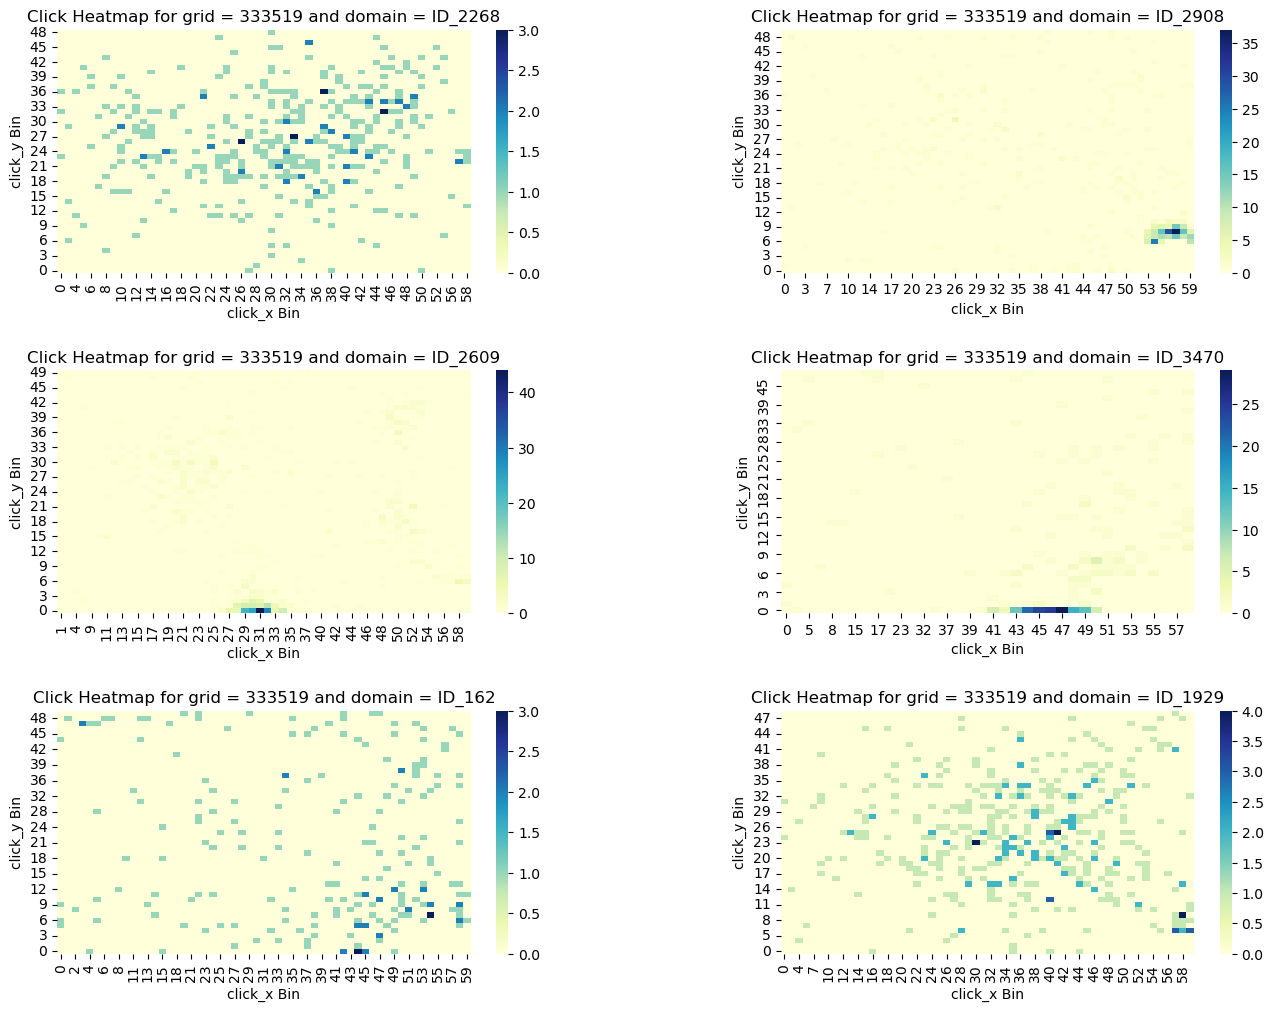

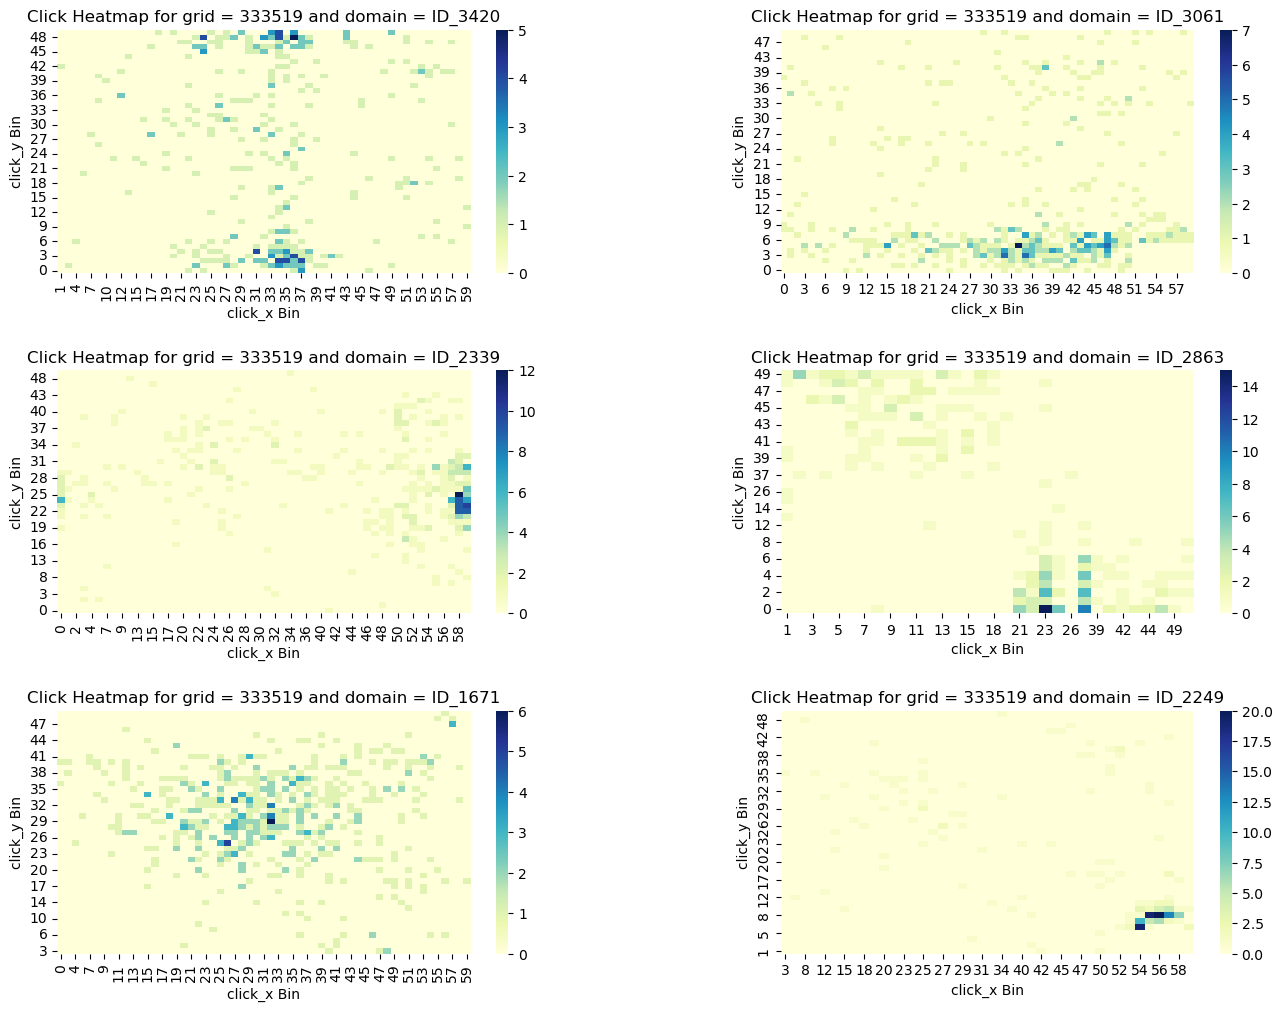

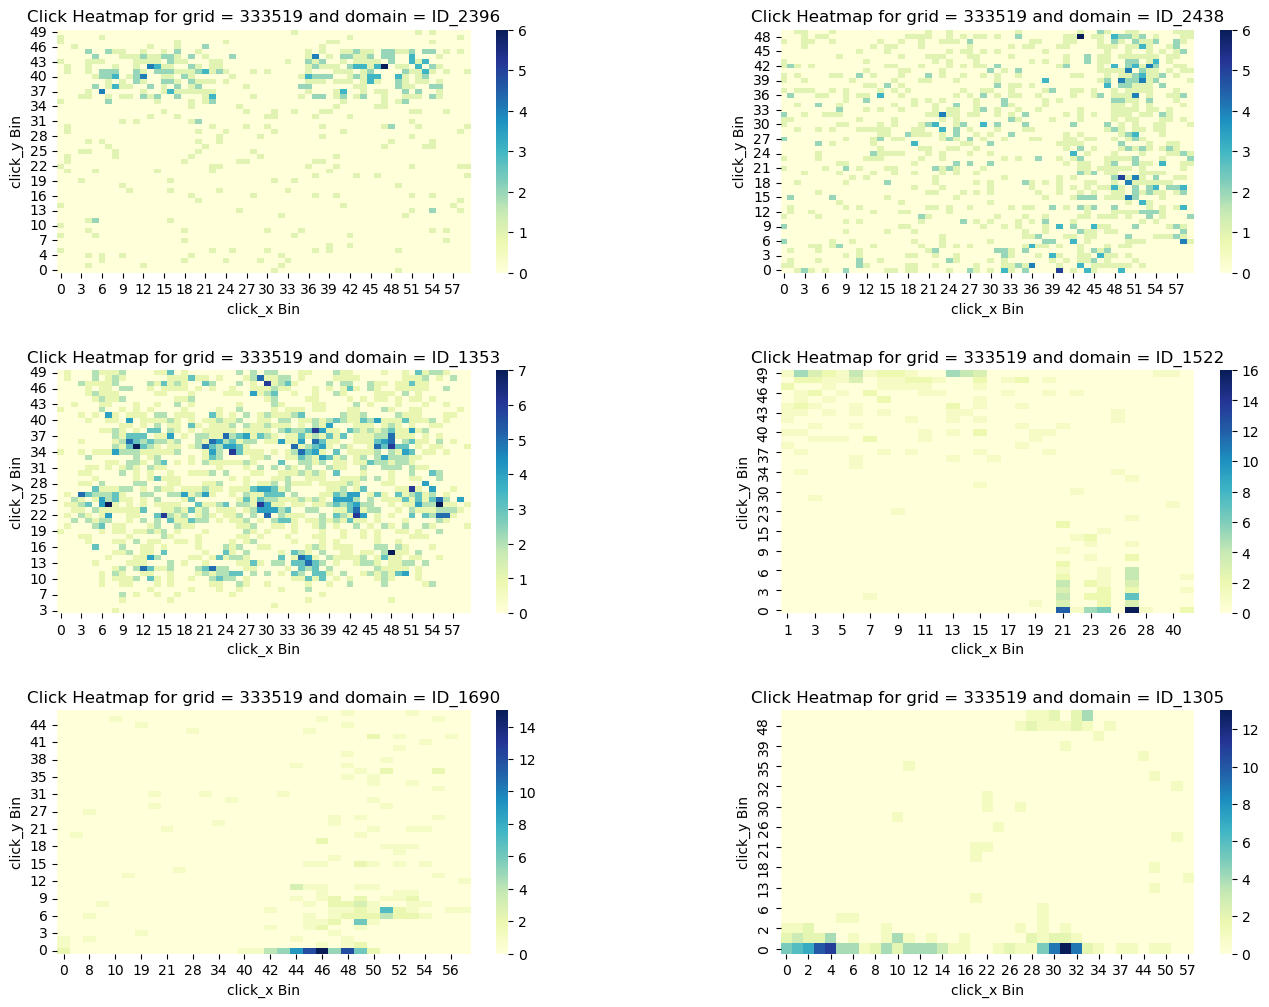

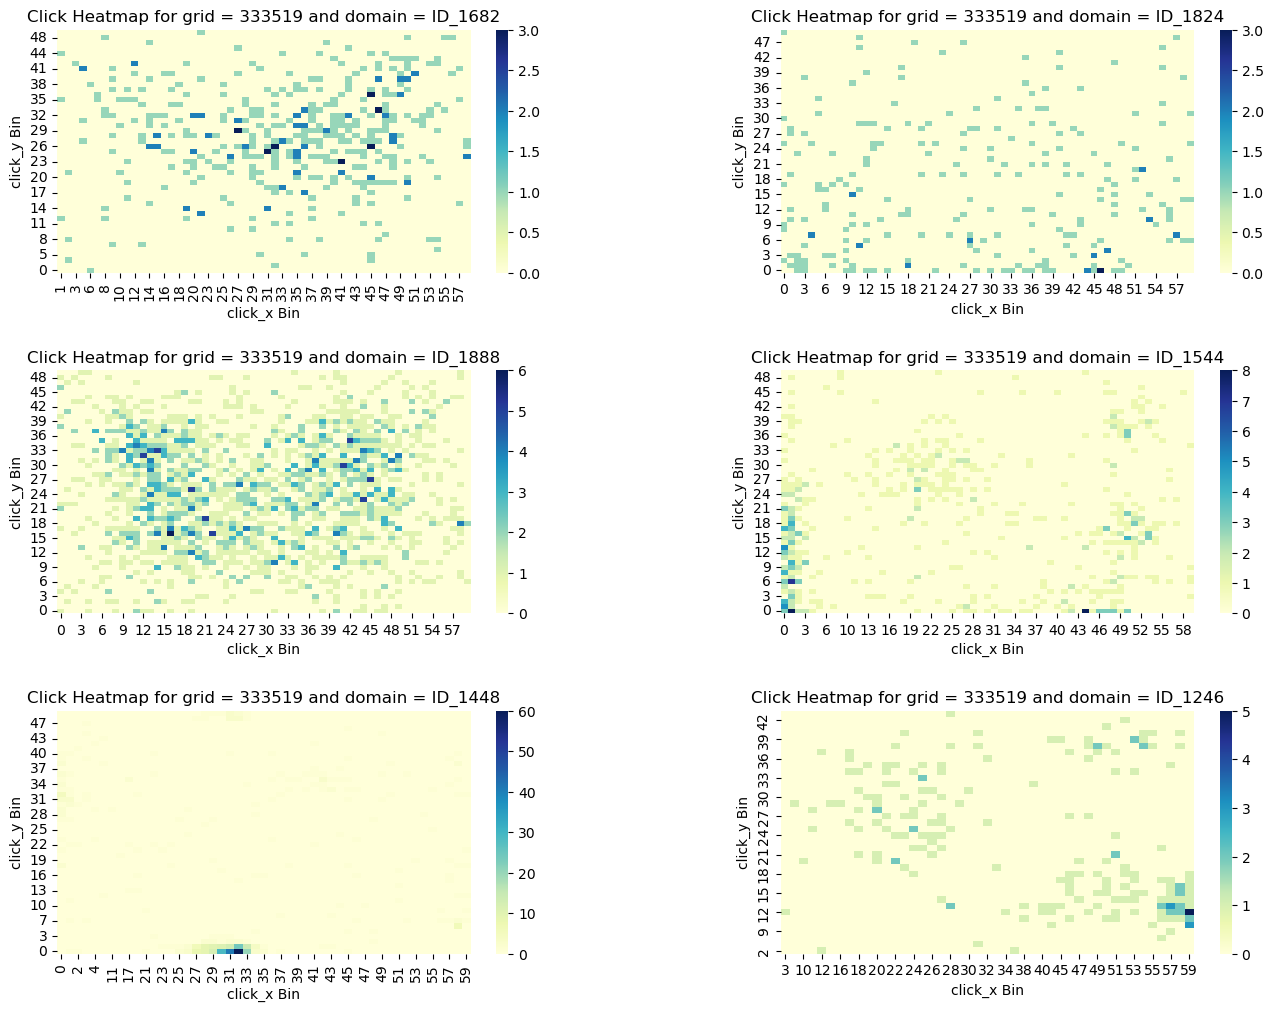

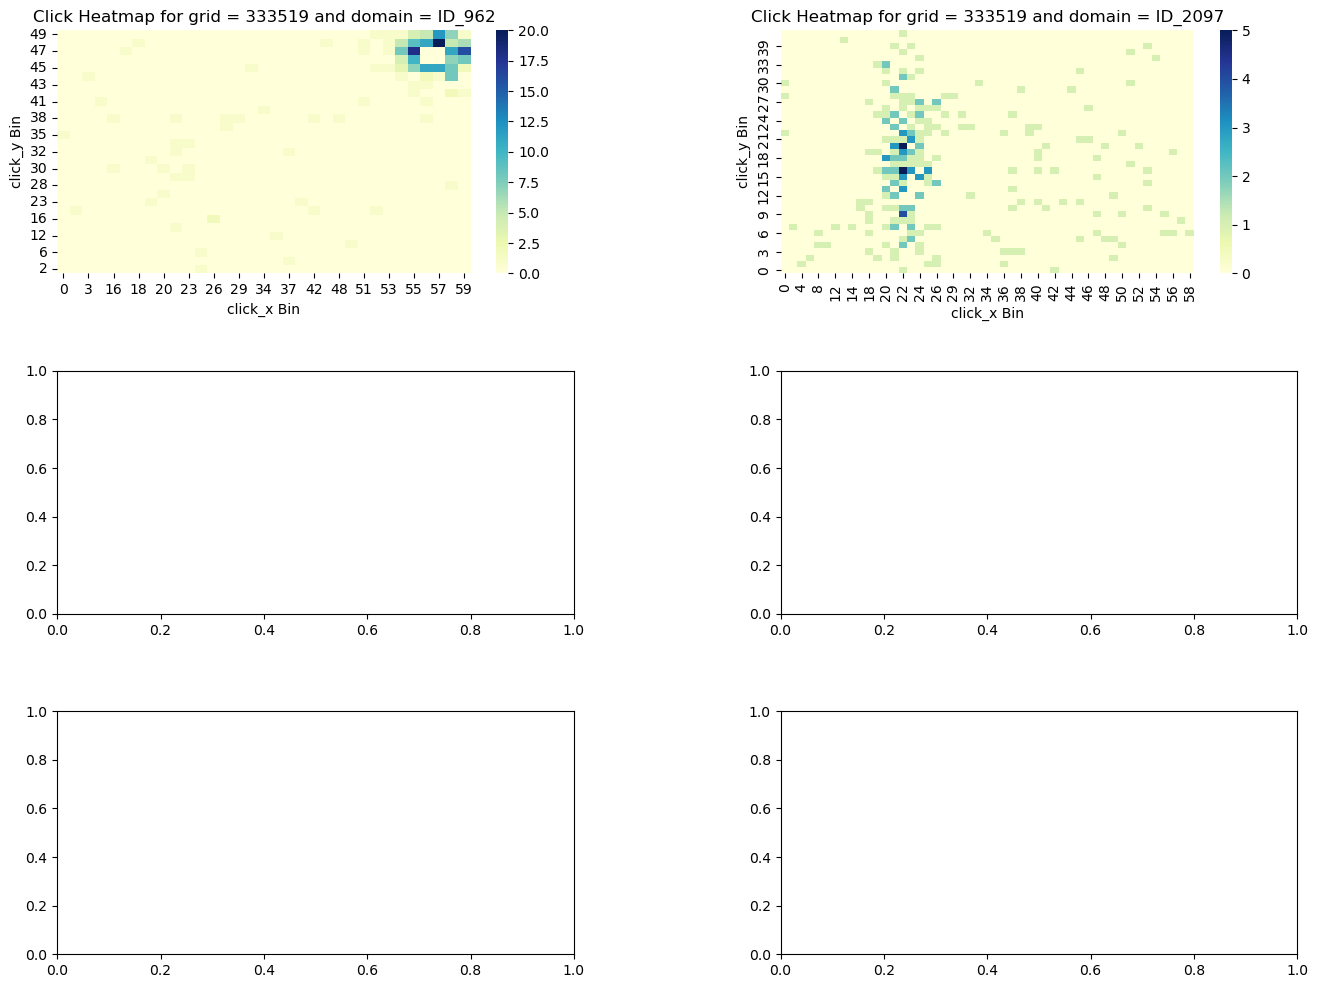

In [11]:
# example of broken banners (pretty sure) for grid_id = 333519:

some_broken = {'ID_1246', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522', 'ID_1544', 
               'ID_162',  'ID_1671', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888', 'ID_1929', 
               'ID_2097', 'ID_2249', 'ID_2268', 'ID_2339', 'ID_2396', 'ID_2438', 
               'ID_2609', 'ID_2863', 'ID_2908', 'ID_3061', 'ID_3420', 'ID_3470', 'ID_962'}

some_broken_list = list(some_broken)

n_rows, n_cols = 3, 2  # 3x2 layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Adjust the figure size as needed
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

plot_count = 0
total_plots = len(some_broken_list)

for idx, br in enumerate(some_broken_list):
    GRID_ID = 333519
    ID = br
#    print(br)
    ex = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                           (aggregated_clicks.domain == ID)]

    click_matrix = ex.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
    
    if plot_count == n_rows * n_cols:  # Check if the figure is full
        #plt.savefig(f'heatmap_combined_{idx}.png', bbox_inches='tight')  # Save current figure
        plt.show()
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))  # Start a new figure
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        plot_count = 0  # Reset plot count for the new figure

    row = plot_count // n_cols
    col = plot_count % n_cols
    
    ax = axes[row, col]
    sns.heatmap(click_matrix, 
                cmap="YlGnBu", 
                annot=False, 
                cbar=True, 
                fmt="g", 
                ax=ax)
    ax.set_title(f'Click Heatmap for grid = {GRID_ID} and domain = {ID}')
    ax.set_xlabel('click_x Bin')
    ax.set_ylabel('click_y Bin')
    ax.invert_yaxis()
    
    plot_count += 1

if plot_count > 0:
#    plt.savefig(f'heatmap_combined_final.png', bbox_inches='tight')
    plt.show()



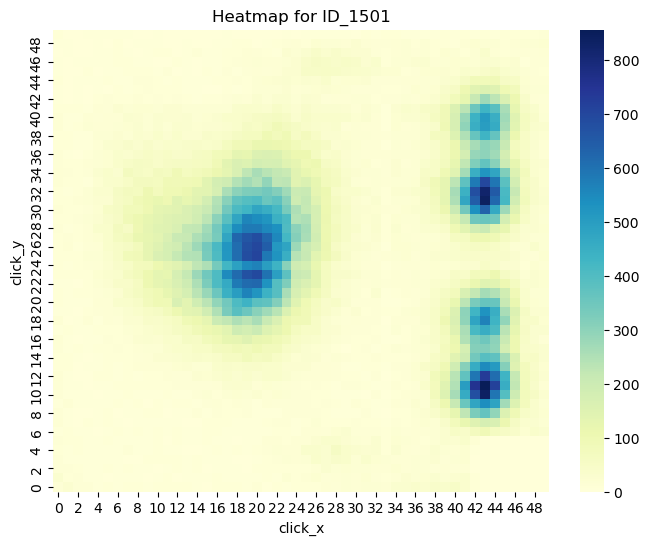

In [12]:
x = data_heatmap_expanded[(data_heatmap_expanded.grid_id == 333519) & 
                          (data_heatmap_expanded.domain == 'ID_1501')]
heatmap_data, xedges, yedges = np.histogram2d(x['click_x'], x['click_y'], 
                                              bins=[50, 50])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True)
plt.title(f'Heatmap for ID_1501')
plt.xlabel('click_x')
plt.ylabel('click_y')
plt.gca().invert_yaxis() # Invert y-axis to match the coordinate system
plt.show()

Total number of clicks for domain = ID_1 and grid = 333346: 550


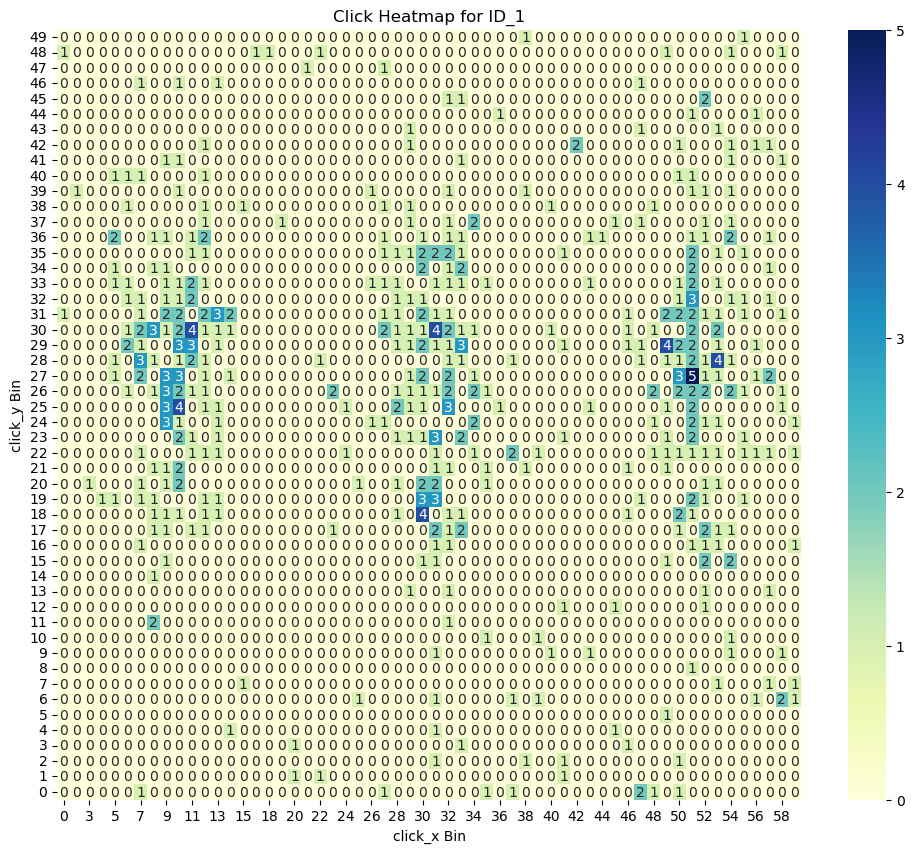

Total number of clicks for domain = ID_10 and grid = 333346: 2257


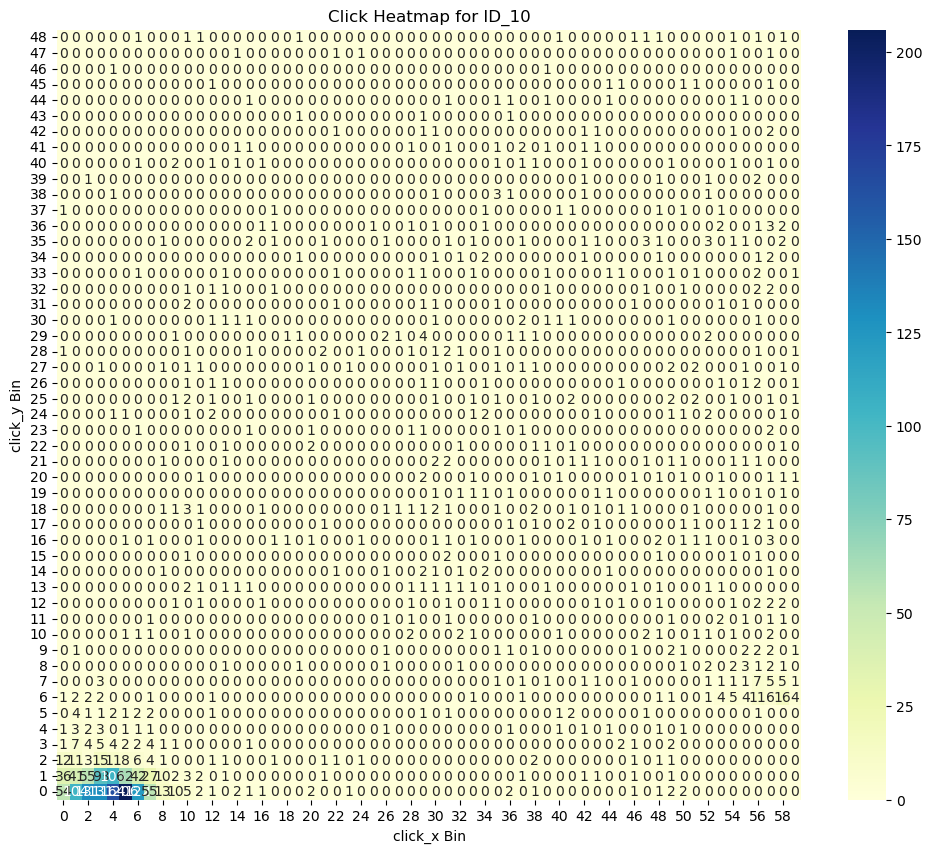

Total number of clicks for domain = ID_1002 and grid = 333346: 577


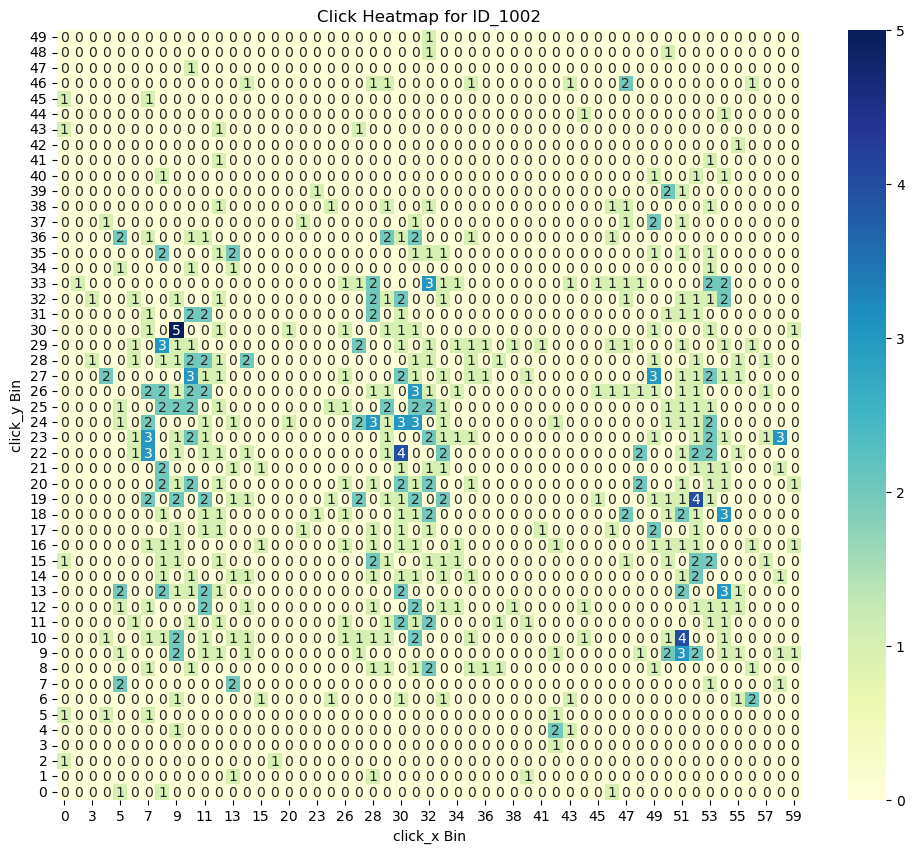

In [13]:
unique_domains = aggregated_clicks['domain'].unique()

for domain in unique_domains[:3]:
    domain_data = aggregated_clicks[(aggregated_clicks.grid_id == 333346) & 
                                    (aggregated_clicks['domain'] == domain)]
    
    click_matrix = domain_data.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
    tot_clicks = domain_data['clicks_sum'].sum()
    print(f'Total number of clicks for domain = {domain} and grid = {333346}: {tot_clicks}')
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(click_matrix, cmap="YlGnBu", annot=True, cbar=True, fmt="g")
    plt.title(f'Click Heatmap for {domain}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis()  # Adjust to match the coordinate system orientation if necessary
    plt.show()

Total number of clicks for domain = ID_2835 and grid = 333346: 8146


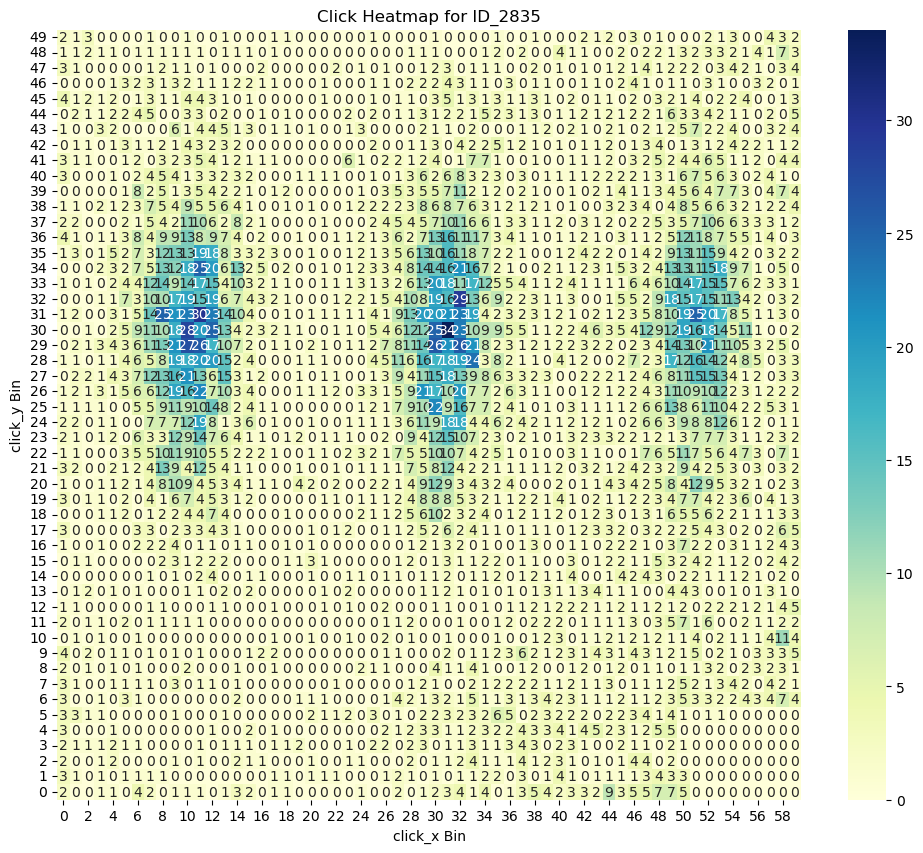

In [34]:
domain = 'ID_2835'
domain_data = aggregated_clicks[(aggregated_clicks.grid_id == 333346) & 
                                (aggregated_clicks['domain'] == domain)]

click_matrix = domain_data.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
tot_clicks = domain_data['clicks_sum'].sum()
print(f'Total number of clicks for domain = {domain} and grid = {333346}: {tot_clicks}')

plt.figure(figsize=(12, 10))
sns.heatmap(click_matrix, cmap="YlGnBu", annot=True, cbar=True, fmt="g")
plt.title(f'Click Heatmap for {domain}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis()  # Adjust to match the coordinate system orientation if necessary
plt.show()

Total number of clicks for domain = ID_3562 and grid = 333346: 12291


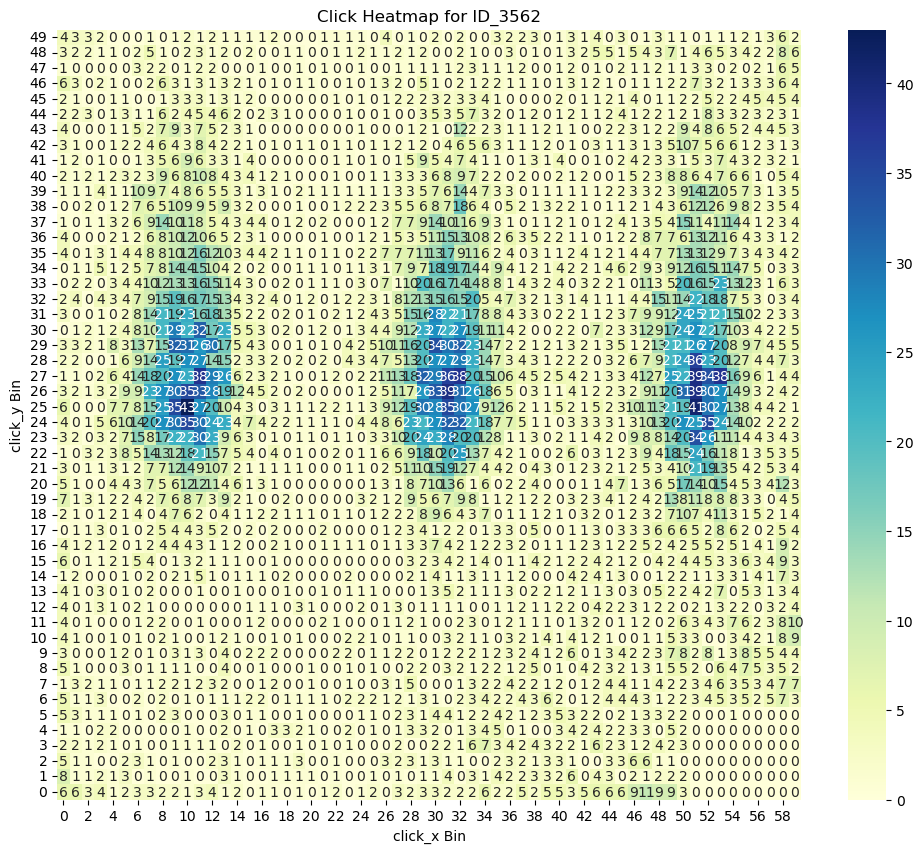

In [36]:
domain = 'ID_3562'
domain_data = aggregated_clicks[(aggregated_clicks.grid_id == 333346) & 
                                (aggregated_clicks['domain'] == domain)]

click_matrix = domain_data.pivot("click_y_bin", "click_x_bin", "clicks_sum").fillna(0)
tot_clicks = domain_data['clicks_sum'].sum()
print(f'Total number of clicks for domain = {domain} and grid = {333346}: {tot_clicks}')

plt.figure(figsize=(12, 10))
sns.heatmap(click_matrix, cmap="YlGnBu", annot=True, cbar=True, fmt="g")
plt.title(f'Click Heatmap for {domain}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis()  # Adjust to match the coordinate system orientation if necessary
plt.show()

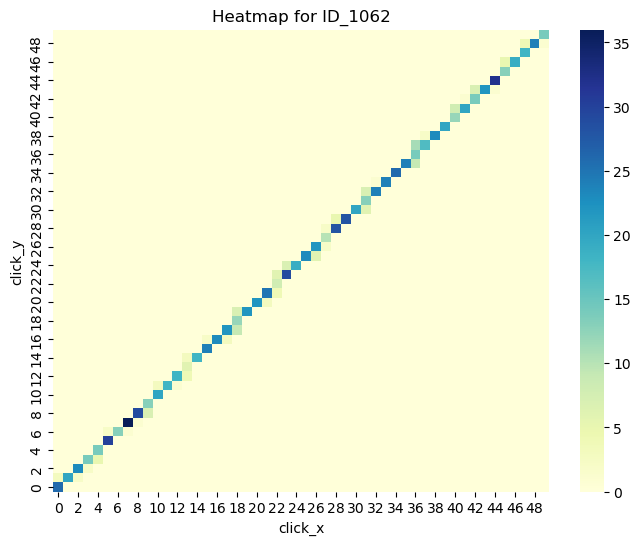

In [14]:
data_heatmap_expanded = data_heatmap.loc[
                                         data_heatmap.index.repeat(data_heatmap['clicks'])
                                        ].reset_index(drop=True)

x = data_heatmap_expanded[(data_heatmap_expanded.grid_id == 333346) & 
                          (data_heatmap_expanded.domain == 'ID_1062')]

heatmap_data, xedges, yedges = np.histogram2d(x['click_x'], x['click_y'], 
                                              bins=[50, 50])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True)
plt.title(f'Heatmap for ID_1062')
plt.xlabel('click_x')
plt.ylabel('click_y')
plt.gca().invert_yaxis() 
plt.show()

# Some Bootstrap functions

In [15]:
# def weighted_bootstrap_resample(data, weights, n_bootstraps=1000):
#     boot_means = []
#     for _ in range(n_bootstraps):
#         indices = np.random.choice(data.index, 
#                                    size=len(data), 
#                                    replace=True, 
#                                    p=weights)
#         boot_sample = data.loc[indices]
#         boot_means.append(np.mean(boot_sample['clicks_sum']))
#     return np.mean(boot_means), np.percentile(boot_means, [2.5, 97.5])

def weighted_bootstrap_resample(data, drawing_distro, emp_distro, size, n_bootstraps=1000):
    tot_log_proba = 0
    for _ in range(n_bootstraps):
        indices = np.random.choice(data.index, 
                                   size=size, 
                                   replace=True, 
                                   p=data[drawing_distro])
        log_proba = np.log(data.loc[indices][emp_distro]).sum()
        tot_log_proba += log_proba
    return tot_log_proba/n_bootstraps #boots[['click_x_bin','click_y_bin', 'boot']]

## Chi-Squared:

In [16]:
from scipy.stats import chisquare

def Chi_squared_test(aggregated_clicks, aggregated_clicks_by_grid, ID, GRID_ID):
    observed = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                                 (aggregated_clicks.domain == ID)]

    click_stat_grid = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == GRID_ID]
    click_stat_grid = click_stat_grid.copy()
    click_stat_grid['bin_prob'] = click_stat_grid['clicks_sum']/click_stat_grid['clicks_sum'].sum()

    observed_freq = observed.merge(click_stat_grid, 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    observed_freq = observed[['click_x_bin',
                              'click_y_bin',
                              'clicks_sum']].merge(click_stat_grid[['click_x_bin',
                                                    'click_y_bin',
                                                    'bin_prob']], 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    total_observations = observed_freq['clicks_sum'].sum()
    observed_freq['Expected'] = observed_freq['bin_prob'] * total_observations

    # Perform Chi-square test
    chi_square_stat, p_value = chisquare(f_obs = observed_freq['clicks_sum'], 
                                         f_exp = observed_freq['Expected'])
    
    return chi_square_stat, p_value, total_observations

# Data enhancement

In [17]:
def enhance_data_with_noise(data, prob, size, sdev):
    indices = np.random.choice(data.index, 
                                   size, 
                                   replace=True, 
                                   p = data[prob])
    
    pert_x = np.random.normal(0, sdev, size).round().astype(int)
    pert_y = np.random.normal(0, sdev, size).round().astype(int)

    x = data.loc[indices][['click_x_bin', 'click_y_bin']] + np.array((pert_x, pert_y)).reshape(-1,2)
    x_bin_max = data['click_x_bin'].max()
    y_bin_max = data['click_y_bin'].max()
    
    x[x['click_x_bin'] < 0]['click_x_bin'] = 0
    x[x['click_y_bin'] < 0]['click_y_bin'] = 0
    x[x['click_x_bin'] > x_bin_max]['click_x_bin'] = x_bin_max
    x[x['click_y_bin'] > y_bin_max]['click_y_bin'] = y_bin_max
    
    x = x.groupby(['click_x_bin','click_y_bin']).size().reset_index(name = 'clicks_sum')

    tt = pd.DataFrame(list(product(range(0,x_bin_max+1), range(0,y_bin_max+1))), 
                      columns=['click_x_bin', 'click_y_bin'])

    data_obs_merged = tt.merge(x, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
#    data_obs_merged['boots_clicks'].sum()
    return data_obs_merged

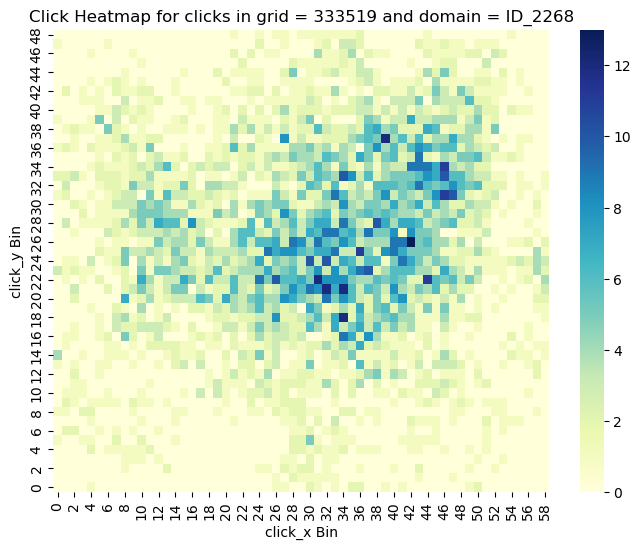

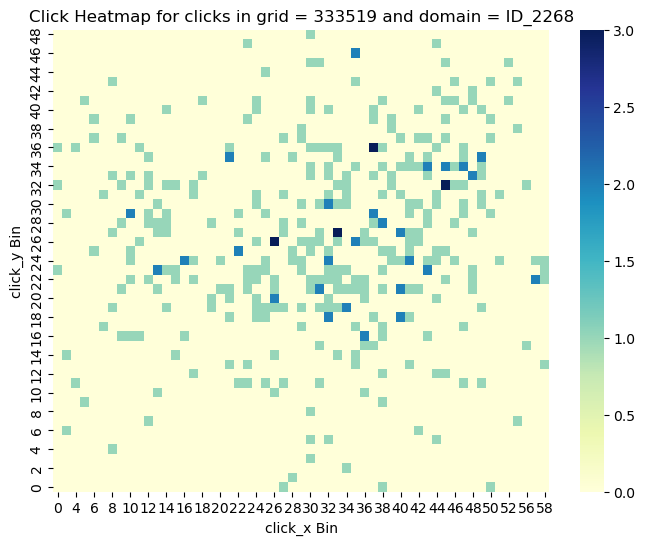

In [18]:
# example

GRID_ID = 333519
ID = 'ID_2268'

data_obs = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                             (aggregated_clicks.domain == ID)]

data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()


ex = enhance_data_with_noise(data_obs, 'proba', 5000, 2)

click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(8, 6))

sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for clicks in grid = {GRID_ID} and domain = {ID}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig(f'hm_{ID}_{GRID_ID}.png', bbox_inches='tight')
plt.show()

ex = data_obs
click_matrix = ex.pivot("click_y_bin","click_x_bin", "clicks_sum").fillna(0)

plt.figure(figsize=(8, 6))

sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")

plt.title(f'Click Heatmap for clicks in grid = {GRID_ID} and domain = {ID}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
#plt.savefig(f'hm_{ID}_{GRID_ID}.png', bbox_inches='tight')
plt.show()

In [19]:
# chi squared test function with noise enhancement:

def Chi_squared_test_enh(aggregated_clicks, aggregated_clicks_by_grid, ID, GRID_ID, samp_size, stdev):
    observed = aggregated_clicks[(aggregated_clicks.grid_id == GRID_ID) &
                                 (aggregated_clicks.domain == ID)]
    
    observed['proba'] = observed['clicks_sum']/observed['clicks_sum'].sum()
    
    observed = enhance_data(observed, 'proba', samp_size, stdev)
    
    click_stat_grid = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == GRID_ID]
    click_stat_grid = click_stat_grid.copy()
    click_stat_grid['bin_prob'] = click_stat_grid['clicks_sum']/click_stat_grid['clicks_sum'].sum()

    observed_freq = observed.merge(click_stat_grid, 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    observed_freq = observed[['click_x_bin',
                              'click_y_bin',
                              'clicks_sum']].merge(click_stat_grid[['click_x_bin',
                                                    'click_y_bin',
                                                    'bin_prob']], 
                                   on=['click_x_bin',
                                       'click_y_bin'], 
                                   how='right').fillna(0)

    total_observations = observed_freq['clicks_sum'].sum()
    observed_freq['Expected'] = observed_freq['bin_prob'] * total_observations

    chi_square_stat, p_value = chisquare(f_obs = observed_freq['clicks_sum'], 
                                         f_exp = observed_freq['Expected'])
    
    return chi_square_stat, p_value, total_observations